# Capstone 1 Exploratory Data Analysis

#### Contents
Introduction  <br>
Salary difference of means above/below average 3PAr  <br> 
3PAr difference above/below average salary <br>
ANOVA test of salary versus position <br>
PER analysis

### Introduction

In the previous portion of the Capstone 1 project, we noticed several interesting trends based on a graphical analysis of our NBA dataset. First, salaries have increased fairly steadily since the 1990s. Second, in the 2000s, as the NBA playstyle has evolved to incorportate a higher number of 3-point shots, certain 3-point-associated statistics have increased including 3-point percentage and 3PAr, which is a ratio of 3-point attempts divided by field goal attempts. Third, usage percentage appears to be higher among older players.  

We'll begin by importing the necessary libraries and reading the relevant dataset. 

In [2]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Allow all columns to be displayed
pd.set_option('display.max_columns', 999)

In [4]:
# Read the relevent dataset 
dfnbaall = pd.read_csv('nba_final_dataset.csv')
dfnbaall.head(10)

,Unnamed: 0,Player,year_start,year_end,Year,Team,Salary,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len
0,0,Alaa Abdelnaby,1991,1995,1991,Portland Trailblazers,395000,PF,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4
1,1,Alaa Abdelnaby,1991,1995,1992,Portland Trailblazers,494000,PF,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4
2,2,Alaa Abdelnaby,1991,1995,1993,Boston Celtics,500000,PF,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.000,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4
3,3,Alaa Abdelnaby,1991,1995,1994,Boston Celtics,805000,PF,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.000,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4
4,4,Alaa Abdelnaby,1991,1995,1995,Sacramento Kings,650000,PF,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.000,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4
5,5,Mahmoud Abdul-Rauf,1991,2001,1991,Denver Nuggets,1660000,PG,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.1,10
6,6,Mahmoud Abdul-Rauf,1991,2001,1992,Denver Nuggets,2008000,PG,22.0,81.0,11.0,1538.0,12.6,0.469,0.111,0.128,1.5,6.8,4.0,21.0,1.4,0.2,11.6,26.7,-0.2,0.8,0.6,0.018,-1.7,-3.5,-5.2,-1.3,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,10.3,10
7,7,Mahmoud Abdul-Rauf,1991,2001,1993,Denver Nuggets,2358000,PG,23.0,81.0,81.0,2710.0,15.6,0.515,0.140,0.165,2.0,6.8,4.4,20.8,1.5,0.2,11.0,25.5,3.0,2.2,5.1,0.091,1.1,-2.1,-1.0,0.7,633.0,1407.0,0.450,70.0,197.0,0.355,563.0,1210.0,0.465,0.475,217.0,232.0,0.935,51.0,174.0,225.0,344.0,84.0,8.0,187.0,179.0,1553.0,19.2,10
8,8,Mahmoud Abdul-Rauf,1991,2001,1994,Denver Nuggets,1825000,PG,24.0,80.0,78.0,2617.0,16.7,0.521,0.104,0.179,1.2,5.8,3.6,24.1,1.6,0.2,9.9,24.9,4.4,2.4,6.8,0.125,1.6,-2.1,-0.6,0.9,588.0,1279.0,0.460,42.0,133.0,0.316,546.0,1146.0,0.476,0.476,219.0,229.0,0.956,27.0,141.0,168.0,362.0,82.0,10.0,151.0,150.0,1437.0,18.0,10
9,9,Mahmoud Abdul-Rauf,1991,2001,1995,Denver Nuggets,2200000,PG,25.0,73.0,43.0,2082.0,17.8,0.543,0.214,0.155,1.9,5.9,3.9,23.0,1.9,0.3,10.0,25.8,3.8,1.3,5.0,0.115,2.2,-2.8,-0.6,0.7,472.0,1005.0,0.470,83.0,215.0,0.386,389.0,790.0,0.492,0.511,138.0,156.0,0.885,32.0,105.0,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,16.0,10


In [5]:
# Drop the unnamed column
dfnbaall = dfnbaall.drop(columns=['Unnamed: 0'])

Next, we'll create some functions that we'll be using.

In [7]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [8]:
# Create a function to determine the difference of means between two arrays
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [9]:
# Define Pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]

In our data story, we found that two 3-point related statistics have increased fairly steadily over close to the last 15 years - 3PAr and 3P%. So, we would like to determine if there is a correlation between higher values in these 3-point statistics and higher salaries. For both, we'll perform a two sample bootsrtap test two different ways. First, we'll divide groups by 3PAr and 3P%, respectively and compute the mean salary difference between those above and below the average 3Par and 3P%. Second, we'll divide players by average salary and compute the difference in mean 3PAr and 3P%. For all of these tests, our null hypothesis will be that there is no difference between the two groups of players,  regardless of how their divided. Our alternative hypthesis will be that there is a difference. 

### Salary difference of means above/below average 3PAr

Null hypothesis: There is no difference in average salary for players above and below the average 3PAr level.

Alternate hypothesis: There is a difference in average salary for players above and below the average 3PAr level.

In [10]:
# Salary and 3PAr data of all players above the 3PAr average
abvav3sal = dfnbaall.loc[dfnbaall['3PAr'] > np.mean(dfnbaall['3PAr']),  ['3PAr', 'Salary']]
abvav3sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4375 entries, 9 to 9616
Data columns (total 2 columns):
3PAr      4375 non-null float64
Salary    4375 non-null int64
dtypes: float64(1), int64(1)
memory usage: 102.5 KB


In [11]:
# Salary and 3PAr data of all players below the 3PAr average
belav3sal = dfnbaall.loc[dfnbaall['3PAr'] < np.mean(dfnbaall['3PAr']),  ['3PAr', 'Salary']]
belav3sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5246 entries, 0 to 9620
Data columns (total 2 columns):
3PAr      5246 non-null float64
Salary    5246 non-null int64
dtypes: float64(1), int64(1)
memory usage: 123.0 KB


In [12]:
# Salary data for all players above and below average 3PAr
abvav3salval = abvav3sal['Salary']
belav3salval = belav3sal['Salary']

In [13]:
# Difference of means between the salaries
diff_means3sal = diff_of_means(abvav3salval, belav3salval)
diff_means3sal

368052.3836355321

In [14]:
# Two sample bootstrap of 10000 replicates, applying the difference of means function
perm_reps3sal = draw_perm_reps(abvav3salval, belav3salval, diff_of_means, 10000)

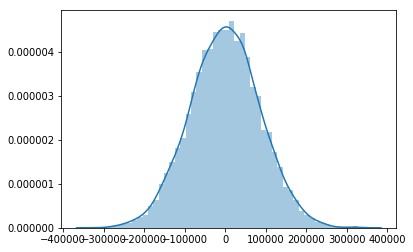

In [15]:
# Plot of the bootstrap distribution
sns.distplot(perm_reps3sal)

In [16]:
# Compute p-value: p
p_3salmean = np.sum(perm_reps3sal >= diff_means3sal) / len(perm_reps3sal)
print('The mean salary difference between players who are above and below the average 3PAr is', 
      str(diff_means3sal))
print('The p-value = ', p_3salmean)

The mean salary difference between players who are above and below the average 3PAr is 368052.3836355321
The p-value =  0.0


Our p-value is well below both the 0.05 and 0.01 threshold, so we can reject our null hypothesis and, thus, conclude that there is a significant difference in salary for players above and below the averge 3PAr value. 

### 3PAr difference of means above/below average salary

We can also compute the difference of means in 3PAr between players above and below the average salary to see if we get a similar result for the p-value.

Null hypothesis: There is no difference in average 3PAr for players above and below the average salary.

Alternate hypothesis: There is a difference in average 3PAr for players above and below the average salary.

In [18]:
# Salary and 3PAr values for players above the average salary
abvav3 = dfnbaall.loc[dfnbaall['Salary'] > np.mean(dfnbaall['Salary']),  ['3PAr', 'Salary']]
abvav3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3074 entries, 17 to 9612
Data columns (total 2 columns):
3PAr      3074 non-null float64
Salary    3074 non-null int64
dtypes: float64(1), int64(1)
memory usage: 72.0 KB


In [19]:
# Salary and 3PAr values for players below the average salary
belav3 = dfnbaall.loc[dfnbaall['Salary'] < np.mean(dfnbaall['Salary']),  ['3PAr', 'Salary']]
belav3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6547 entries, 0 to 9620
Data columns (total 2 columns):
3PAr      6547 non-null float64
Salary    6547 non-null int64
dtypes: float64(1), int64(1)
memory usage: 153.4 KB


In [20]:
# 3PAr values
abvav3val = abvav3['3PAr']
belav3val = belav3['3PAr']

In [21]:
# Difference of means between 3PAr values of both groups
diff_means3 = diff_of_means(abvav3val, belav3val)
diff_means3

0.0007470159466508031

In [22]:
# Two sample bootstrap of 10000 replicates, applying the difference of means function
perm_reps3 = draw_perm_reps(abvav3val, belav3val, diff_of_means, 10000)

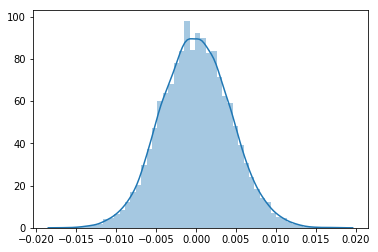

In [23]:
# Plot the distribution
sns.distplot(perm_reps3)

In [24]:
# Compute p-value: p
p_3mean = np.sum(perm_reps3 >= diff_means3) / len(perm_reps3)
print('The mean 3PAr difference between players who are above and below the average salary is', 
      str(diff_means3))
print('The p-value = ', p_3mean)

The mean 3PAr difference between players who are above and below the average salary is 0.0007470159466508031
The p-value =  0.4261


The p-value is well above the 0.05 and 0.01 threshold, so we can't reject our null hypothesis and have to accept that there is no significant 3PAr difference between players above and below the average salary level. 

As mentioned above, we'll be doing calculations for 3P% similar to what we did for 3PAr.

Our data story also suggested that usage percentage is higher among older players. Older players, having been in the league longer, also get paid a higher average salary than younger players, implying that usage rate should be higher among players who get paid higher salaries.

### ANOVA test of salary versus position

We're also interested in determining whether there is a significant difference in salary based on position. A graphical anaylsis in the data story had indicated that point guards appeared to be paid the least and had the lowest amount of variation, while centers and power forwards had the largest variation. In order to compare all 5 positions together, we'll be conducting an ANOVA analysis. 

For this analysis, our null hypothesis will be that there is no difference in salary between all 5 positions. Our alternative hypothesis is that there is as signficant difference in salary between positions. 

In [6]:
# Import the necessary libraries
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
# We'll begin by getting some basic stats about the salary column
rp.summary_cont(dfnbaall['Salary'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Salary,9621.0,3.535028e+06,4.226466e+06,43089.081696,3.450564e+06,3.619491e+06


In [8]:
# Next, we'll get details about each position
rp.summary_cont(dfnbaall['Salary'].groupby(dfnbaall['Pos']))

,N,Mean,SD,SE,95% Conf.,Interval
Pos,,,,,,
C,1979,3.796417e+06,4.288673e+06,96405.112966,3.607416e+06,3.985419e+06
PF,2030,3.869948e+06,4.513690e+06,100180.615818,3.673546e+06,4.066351e+06
PG,1836,3.100985e+06,3.916515e+06,91403.639404,2.921785e+06,3.280185e+06
SF,1864,3.451256e+06,4.121353e+06,95458.990769,3.264106e+06,3.638406e+06
SG,1912,3.407347e+06,4.191853e+06,95865.439075,3.219402e+06,3.595292e+06


Power forwards have the highest mean salary and standard deviation, while point guards have the smallest values in both of those categories.

In [9]:
# Calculation of the F-statistic and p-value
stats.f_oneway(dfnbaall['Salary'][dfnbaall['Pos'] == 'PG'], 
             dfnbaall['Salary'][dfnbaall['Pos'] == 'SG'],
             dfnbaall['Salary'][dfnbaall['Pos'] == 'SF'], 
              dfnbaall['Salary'][dfnbaall['Pos'] == 'PF'], 
              dfnbaall['Salary'][dfnbaall['Pos'] == 'C'])

F_onewayResult(statistic=10.581413749062929, pvalue=1.4896111851091458e-08)

The F-statistic and p-value calcuation suggests that positon does seem to have some affect on salary. However, we'll need to do a more detailed analysis to learn more. 

In [10]:
# A regression for the 5 positons
results = ols('Salary ~ C(Pos)', data=dfnbaall).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     10.58
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.49e-08
Time:                        02:01:02   Log-Likelihood:            -1.6042e+05
No. Observations:                9621   AIC:                         3.208e+05
Df Residuals:                    9616   BIC:                         3.209e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.796e+06   9.48e+04     40.039      0.000    3.61e+06    3.98e+06
C(Pos)[T.PF]  7.353e+04   1.33e+05      0.552      0.581   -1.88e+05    3.35e+05
C(Pos)[T.PG] -6.954e+05   1.37e+05     -5.088      0.000   -9.63e+05   -4.28e+05
C(Pos)[T.SF] -3.452e+05   1.36e+05     -2.535      0.011   -6.12e+05   -7.83e+04
C(Pos)[T.SG] -3.891e+05   1.35e+05     -2.876      0.004   -6.54e+05   -1.24e+05
==============================================================================
Omnibus:                     3984.578   Durbin-Watson:                   0.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16009.183
Skew:                           2.076   Prob(JB):                         0.00
Kurtosis:                       7.765   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The F-stat and p-value indicate that there is a significant difference between the mean salaries of each of these five positions. However, it also indicates that there is no signifcant difference between the salaries of centers and power forwards.

In [12]:
# An ANOVA table
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Pos),7.530635e+14,4.0,10.581414,1.489611e-08
Residual,1.710891e+17,9616.0,NaN,NaN


For more information, we've created the above ANOVA table. The sum of squares gives the amount of variance in the data. In this case, there is a great amount of variance. Paired with the extremely low p-value, the ANOVA test indoicates that we should reject our null hypothesis. We can conclude that there is a significant difference in salary between positions. It's likely the case that position does influence salary (in addition to other variables, as we've seen). Centers and power forwards are paid more than other positions, while point guards are paid the least, by a wide margin. As we stated in our data story, it's not immediately clear as to why point guards are paid so much less, and our dataset doesn't have the necessary data for us to develop a testable hypothesis. The main takeaway for players is that being center or power forward is, on average, more lucrative than being a point guard and that's one's position does influence one's salary. 

### PER analysis

One curious statistic is PER or player efficiency rating. It's calculated using a fairly elaborate equation that takes into account at least a dozen other player stats. It's often cited as a valuable stat in determining the 'best' players in the league, partly because it incorporates so many different variables, both offensive and defensive (though it favors offense over defense). However, our data story graphs seemed to indicate that there was very little difference in PER between players of all different salary ranges. In fact, many players with high salaries often had PER values similar to players near the bottom of the salary scale. So, a question arises as to why such a valuable stat seems to have almost no correlation with salary. 

 We'll start by looking at the distribution of PER data.

(-20, 40)

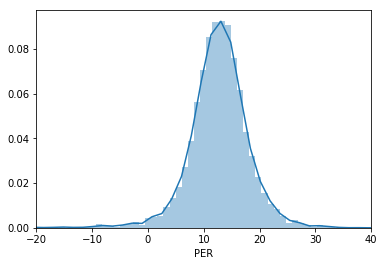

In [18]:
# Distribution of PER
sns.distplot(dfnbaall['PER'], bins=200)
plt.xlim(-20, 40)

It appears that vast majority of PER values fall just under 15. This may be due to the league average being adjusted to 15 every season as a way to better allow comparisons between seasons. Thus, most players fall under the average. However, let's do a bootstrap test to confirm that PER isn't correlated well with salary, as our data story seemed to suggest.